# <center><b>Infrastructure: secure_&_unsecure_cycle_parking</b></center> 

## Directory

[1.1 Guiding Questions/Hypothesis for exploration ](#division_ID1)

[1.2 Data Ingestion and Sense Checking](#division_ID2)

[2.0 Second Round of EDA focussed on Cylce Parking only as significant factor](#division_ID3)

[2.1 Preliminary Visualisations](#division_ID4)

[3.0 Final Figures ready for June 3rd Presentation](#division_ID6)

## Libraries

In [1098]:


# Import the Python libraries.

import pandas as pd
import numpy as np  
import pandas as pd 

import sklearn
import statsmodels.api as sm 

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np  
import pandas as pd 



import sklearn
import statsmodels.api as sm 
import matplotlib.cm as cm
import statsmodels.api as sm
import sklearn
import imblearn
import nltk 
import os
import scipy as scp
import math
import string
import wordcloud
import textblob
import graphviz

!pip install adjustText
from adjustText import adjust_text

import warnings
warnings.filterwarnings("ignore")

## <a id="division_ID1"> 1.1 Guiding Questions/Hypothesis for exploration </a> 

>Hypothetical questions Team 5 assigned to Levon to work through

Hypothesis
There is no difference in infrastructure for the top and bottom 5 boroughs by the number of cyclists per 10k population - Levon
There is no difference in the number of cyclists in boroughs with the same/similar infrastructure levels (look at top and bottom 5 boroughs based on infrastructure levels) - Levon

## <a id="division_ID2">1.2 Data Ingestion and Sense Checking </a> 

In [1099]:
#loading the first iteratiton of data for wrangling 

df_val_full = pd.read_csv('FINAL_london_data_set_3_values_FULL.csv')
df_percent_full = pd.read_csv('FINAL_london_data_set_3_values_FULL.csv')
df12 = pd.read_csv('FINAL_london_data_set_3_values_FULL.csv')

#df_val_full = pd.read_excel('LONDON_data_set_3_values_FULLv1.xlsx')
#df_percent_full = pd.read_excel('LONDON_data_set_3_percents_FULLv1.xlsx')
df1_ = pd.read_excel('LONDON_data_set_3_percents_FULLv2.xlsx')

#This data was sourced the the TfL Central Infrastrcuture database

infra_data_sub = pd.read_excel('infra_data_sub.xlsx')

In [1100]:
df12.columns

Index(['borough_name', 'borough_code', 'gla_region', 'cyclists_per10k', '0to9',
       '10to19', '20to29', '30to39', '40to49', '50to59', '60to69', '70to79',
       '80plus', 'cohabiting', 'married_civptnr', 'multi_person', 'single',
       'single_parent', 'asn_bangl', 'asn_chi', 'asn_ind', 'asn_oth',
       'asn_pak', 'blk_afr', 'blk_car', 'blk_oth', 'mix_oth', 'mix_whtasn',
       'mix_whtblkafr', 'mix_whtblkcar', 'oth_arab', 'oth_oth', 'wht_brit',
       'wht_gyptvl', 'wht_irish', 'wht_oth', 'wht_rom', 'asn_total',
       'blk_total', 'mix_total', 'wht_total', 'oth_total', 'cyle_ln_total',
       'signal_total', 'traffic_calm_total', 'cyle_prk_total',
       'crossing_total', 'male_cyclist', 'female_cyclist',
       'male_cyclist_per10k', 'female_cyclist_per10k', 'hire_bikes',
       'private_bikes', 'hire_bikes_per10k', 'private_bikes_per10k',
       'bike_thefts', 'total_bikes', 'bike_thefts_per10k_pop',
       'bike_thefts_per10k_bikes'],
      dtype='object')

In [1101]:
df1_.columns

Index(['borough_name', 'borough_code', 'cyclists_per10k', 'gla_region',
       'population', 'sqkms', '0to9', '10to19', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70to79', '80plus', 'cohabiting', 'married_civptnr',
       'multi_person', 'single', 'single_parent', 'asn_bangl', 'asn_chi',
       'asn_ind', 'asn_oth', 'asn_pak', 'blk_afr', 'blk_car', 'blk_oth',
       'mix_oth', 'mix_whtasn', 'mix_whtblkafr', 'mix_whtblkcar', 'oth_arab',
       'oth_oth', 'wht_brit', 'wht_gyptvl', 'wht_irish', 'wht_oth', 'wht_rom',
       'asn_total', 'blk_total', 'mix_total', 'wht_total', 'oth_total',
       'cyle_ln_per_10k_pop', 'signal_total_per_10k_pop',
       'traffic_calm_per_10k_pop', 'cyle_prk_per_10k_pop',
       'crossing_per_10k_pop', 'cyle_ln_sqkm', 'signal_total_sqkm',
       'traffic_calm_sqkm', 'cyle_prk_sqkm', 'crossing_sqkm'],
      dtype='object')

In [1102]:
subset_calc = df1_[['borough_name','cyle_ln_per_10k_pop','signal_total_per_10k_pop','traffic_calm_per_10k_pop','cyle_prk_per_10k_pop','crossing_per_10k_pop','cyle_ln_sqkm', 'signal_total_sqkm',
       'traffic_calm_sqkm', 'cyle_prk_sqkm', 'crossing_sqkm']]
       

In [1103]:
#df_minus_sig.merge(df , on= 'borough_name', how='left')

df1 = df12.merge(subset_calc,on= 'borough_name', how='left')

In [1104]:
df.columns

Index(['borough_name', 'borough_code', 'cyclists_per10k', 'gla_region',
       'population', 'sqkms', '0to9', '10to19', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70to79', '80plus', 'cohabiting', 'married_civptnr',
       'multi_person', 'single', 'single_parent', 'asn_bangl', 'asn_chi',
       'asn_ind', 'asn_oth', 'asn_pak', 'blk_afr', 'blk_car', 'blk_oth',
       'mix_oth', 'mix_whtasn', 'mix_whtblkafr', 'mix_whtblkcar', 'oth_arab',
       'oth_oth', 'wht_brit', 'wht_gyptvl', 'wht_irish', 'wht_oth', 'wht_rom',
       'asn_total', 'blk_total', 'mix_total', 'wht_total', 'oth_total',
       'cyle_ln_total', 'signal_total', 'traffic_calm_total', 'cyle_prk_total',
       'crossing_total', 'male_cyclist', 'female_cyclist',
       'male_cyclist_per10k', 'female_cyclist_per10k', 'hire_bikes',
       'private_bikes', 'hire_bikes_per10k', 'private_bikes_per10k', '10k_pop',
       'Prk Buterf2', 'Prk Carr3', 'Prk Cover4', 'Prk Hangar5', 'Prk Hoop6',
       'Prk Locker7', 'Prk Ms

In [1105]:
df1.columns

Index(['borough_name', 'borough_code', 'gla_region', 'cyclists_per10k', '0to9',
       '10to19', '20to29', '30to39', '40to49', '50to59', '60to69', '70to79',
       '80plus', 'cohabiting', 'married_civptnr', 'multi_person', 'single',
       'single_parent', 'asn_bangl', 'asn_chi', 'asn_ind', 'asn_oth',
       'asn_pak', 'blk_afr', 'blk_car', 'blk_oth', 'mix_oth', 'mix_whtasn',
       'mix_whtblkafr', 'mix_whtblkcar', 'oth_arab', 'oth_oth', 'wht_brit',
       'wht_gyptvl', 'wht_irish', 'wht_oth', 'wht_rom', 'asn_total',
       'blk_total', 'mix_total', 'wht_total', 'oth_total', 'cyle_ln_total',
       'signal_total', 'traffic_calm_total', 'cyle_prk_total',
       'crossing_total', 'male_cyclist', 'female_cyclist',
       'male_cyclist_per10k', 'female_cyclist_per10k', 'hire_bikes',
       'private_bikes', 'hire_bikes_per10k', 'private_bikes_per10k',
       'bike_thefts', 'total_bikes', 'bike_thefts_per10k_pop',
       'bike_thefts_per10k_bikes', 'cyle_ln_per_10k_pop',
       'signal_tota

In [1106]:
print(df1.shape)
print(df1.head(2))

(32, 69)
         borough_name borough_code gla_region  cyclists_per10k   0to9  10to19  \
0  Barking & Dagenham    E09000002      Outer            64.88  35582   33354   
1              Barnet    E09000003      Outer            92.08  49355   47271   

   20to29  30to39  40to49  50to59  ...  cyle_ln_per_10k_pop  \
0   28456   36693   32005   25161  ...           913.925822   
1   50436   60964   57557   48519  ...           388.669382   

   signal_total_per_10k_pop  traffic_calm_per_10k_pop  cyle_prk_per_10k_pop  \
0                       0.0                160.906567             82.259193   
1                       0.0                 17.652422             54.172999   

   crossing_per_10k_pop  cyle_ln_sqkm  signal_total_sqkm  traffic_calm_sqkm  \
0              9.661618    560.747922                0.0         233.858268   
1              2.188317    184.371396                0.0          59.802306   

   cyle_prk_sqkm  crossing_sqkm  
0     140.153846      12.768496  
1     172.046

In [1107]:
#renaming columns
df1 = df1.rename(columns={'cyclists_per10k': 'cyclists_per10k_population'})

In [1108]:
df1

,borough_name,borough_code,gla_region,cyclists_per10k_population,0to9,10to19,20to29,30to39,40to49,50to59,...,cyle_ln_per_10k_pop,signal_total_per_10k_pop,traffic_calm_per_10k_pop,cyle_prk_per_10k_pop,crossing_per_10k_pop,cyle_ln_sqkm,signal_total_sqkm,traffic_calm_sqkm,cyle_prk_sqkm,crossing_sqkm
0,Barking & Dagenham,E09000002,Outer,64.88,35582,33354,28456,36693,32005,25161,...,913.925822,0.000000,160.906567,82.259193,9.661618,560.747922,0.000000,233.858268,140.153846,12.768496
1,Barnet,E09000003,Outer,92.08,49355,47271,50436,60964,57557,48519,...,388.669382,0.000000,17.652422,54.172999,2.188317,184.371396,0.000000,59.802306,172.046332,5.747126
2,Bexley,E09000004,Outer,40.41,31226,30552,28385,34822,33146,33873,...,760.886916,0.000000,80.281882,41.036423,2.881115,322.491749,0.000000,166.290323,91.493056,5.237084
3,Brent,E09000005,Outer,180.90,39803,41493,53902,57534,48477,42662,...,503.006319,0.115461,172.672088,80.534123,3.175180,403.379630,0.341588,489.926290,175.914250,6.497342
4,Bromley,E09000006,Outer,108.67,40118,38139,33000,47217,48741,46276,...,630.814279,0.353496,49.607324,60.978124,3.004719,142.664890,0.986842,145.674740,207.000000,7.127883
5,Camden,E09000007,Inner,4426.98,19905,24130,42167,37089,27860,25013,...,484.684435,3.778765,146.215066,334.844839,4.935530,576.605505,10.348469,330.313589,432.685600,7.252125
6,Croydon,E09000008,Outer,74.41,50163,47770,49150,62763,54580,52886,...,572.893043,0.198284,110.840949,64.244128,6.989523,267.213873,0.623053,365.658217,206.041335,17.559153
7,Ealing,E09000009,Outer,312.51,43760,45449,51526,61546,56046,46681,...,869.199454,0.054100,169.712052,102.032812,5.842812,578.972973,0.167785,506.785137,268.660969,12.887828
8,Enfield,E09000010,Outer,47.20,44009,45445,40293,47105,47302,43758,...,984.118742,0.461581,93.123891,55.735860,13.616628,422.190594,1.199400,234.422658,158.230958,33.076384
9,Greenwich,E09000011,Inner,136.82,37809,34101,43079,53646,42529,35151,...,1001.773861,0.000000,204.858956,104.464501,9.971611,624.439746,0.000000,511.864407,206.711409,15.840517


In [1109]:
#df_minus_sig.columns
df1.shape

(32, 69)

In [1110]:
#Team agreed to drop signal from the dataset to continue analysis 

df_minus_sig = df1.drop('signal_total_sqkm',axis=1)
print(df_minus_sig.shape)

(32, 68)


In [1111]:
#excluding the city of london as an outlier becuase of the low number of people resident there

df_minus_sig['infrastructure_mean'] = df_minus_sig.iloc[:, 49:53].mean(axis=1)
df_minus_sig = df_minus_sig.query('borough_name !="City of London"')

[]

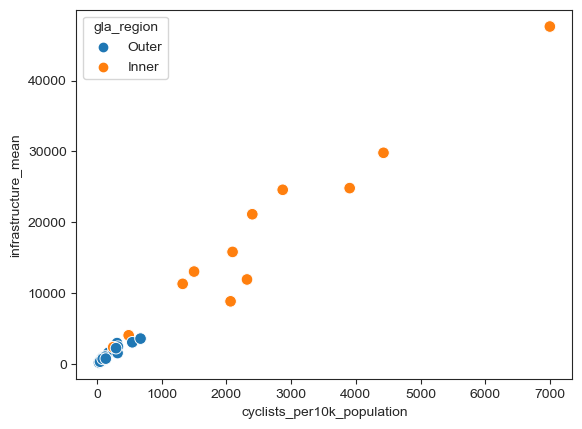

In [1112]:
#initial plot including all electment of infrastructure save signal data 

sns.scatterplot(x="cyclists_per10k_population", y="infrastructure_mean", hue='gla_region', s=70, data=df_minus_sig)
plt.plot()

In [1113]:
#subsetting the data to take a closer look at borough with close to or above average instracture and low cycling 

df5 = df_minus_sig.query('infrastructure_mean > 300 & cyclists_per10k_population < 1000 ')
df5 = df5[['borough_name','gla_region','infrastructure_mean','cyclists_per10k_population']]
df5

,borough_name,gla_region,infrastructure_mean,cyclists_per10k_population
0,Barking & Dagenham,Outer,375.4675,64.88
1,Barnet,Outer,969.7500,92.08
3,Brent,Outer,1611.8575,180.90
4,Bromley,Outer,949.4100,108.67
6,Croydon,Outer,768.9850,74.41
7,Ealing,Outer,2966.1550,312.51
8,Enfield,Outer,420.7925,47.20
9,Greenwich,Inner,1042.4525,136.82
12,Haringey,Outer,2458.3225,326.33
14,Havering,Outer,341.7500,49.56


In [1114]:
#creating dictionary for later labelling 

data = {
    "borough_name": ["Barking & Dagenham", "Bexley","Enfield","Harrow","Havering","Lambeth", "Southwark", "Camden", "Islington", "Westminster"],
    "infrastructure_category": ['Lowest 5 Infrastructure Boroughs', 'Lowest 5 Infrastructure Boroughs', 'Lowest 5 Infrastructure Boroughs', 'Lowest 5 Infrastructure Boroughs', 'Lowest 5 Infrastructure Boroughs', 'Top 5 Infrastructure Boroughs', 'Top 5 Infrastructure Boroughs', 'Top 5 Infrastructure Boroughs','Top 5 Infrastructure Boroughs','Top 5 Infrastructure Boroughs']}

In [1115]:
# create dataframe from data dictionary
df = pd.DataFrame(data)
# print the dataframe
display(df.head())

,borough_name,infrastructure_category
0,Barking & Dagenham,Lowest 5 Infrastructure Boroughs
1,Bexley,Lowest 5 Infrastructure Boroughs
2,Enfield,Lowest 5 Infrastructure Boroughs
3,Harrow,Lowest 5 Infrastructure Boroughs
4,Havering,Lowest 5 Infrastructure Boroughs


In [1116]:
df_minus_sig

,borough_name,borough_code,gla_region,cyclists_per10k_population,0to9,10to19,20to29,30to39,40to49,50to59,...,cyle_ln_per_10k_pop,signal_total_per_10k_pop,traffic_calm_per_10k_pop,cyle_prk_per_10k_pop,crossing_per_10k_pop,cyle_ln_sqkm,traffic_calm_sqkm,cyle_prk_sqkm,crossing_sqkm,infrastructure_mean
0,Barking & Dagenham,E09000002,Outer,64.88,35582,33354,28456,36693,32005,25161,...,913.925822,0.000000,160.906567,82.259193,9.661618,560.747922,233.858268,140.153846,12.768496,375.4675
1,Barnet,E09000003,Outer,92.08,49355,47271,50436,60964,57557,48519,...,388.669382,0.000000,17.652422,54.172999,2.188317,184.371396,59.802306,172.046332,5.747126,969.7500
2,Bexley,E09000004,Outer,40.41,31226,30552,28385,34822,33146,33873,...,760.886916,0.000000,80.281882,41.036423,2.881115,322.491749,166.290323,91.493056,5.237084,269.6050
3,Brent,E09000005,Outer,180.90,39803,41493,53902,57534,48477,42662,...,503.006319,0.115461,172.672088,80.534123,3.175180,403.379630,489.926290,175.914250,6.497342,1611.8575
4,Bromley,E09000006,Outer,108.67,40118,38139,33000,47217,48741,46276,...,630.814279,0.353496,49.607324,60.978124,3.004719,142.664890,145.674740,207.000000,7.127883,949.4100
5,Camden,E09000007,Inner,4426.98,19905,24130,42167,37089,27860,25013,...,484.684435,3.778765,146.215066,334.844839,4.935530,576.605505,330.313589,432.685600,7.252125,29809.4950
6,Croydon,E09000008,Outer,74.41,50163,47770,49150,62763,54580,52886,...,572.893043,0.198284,110.840949,64.244128,6.989523,267.213873,365.658217,206.041335,17.559153,768.9850
7,Ealing,E09000009,Outer,312.51,43760,45449,51526,61546,56046,46681,...,869.199454,0.054100,169.712052,102.032812,5.842812,578.972973,506.785137,268.660969,12.887828,2966.1550
8,Enfield,E09000010,Outer,47.20,44009,45445,40293,47105,47302,43758,...,984.118742,0.461581,93.123891,55.735860,13.616628,422.190594,234.422658,158.230958,33.076384,420.7925
9,Greenwich,E09000011,Inner,136.82,37809,34101,43079,53646,42529,35151,...,1001.773861,0.000000,204.858956,104.464501,9.971611,624.439746,511.864407,206.711409,15.840517,1042.4525


In [1117]:
df_minus_sig.columns = df_minus_sig.columns.str.removesuffix('_x')


In [1118]:
df_minus_sig.columns = df_minus_sig.columns.str.removesuffix('_y')

In [1119]:
#merge creating new column with categorical labels

df_minus_sig = df_minus_sig.merge(df , on= 'borough_name', how='left')


In [1120]:
df_minus_sig.columns = df_minus_sig.columns.str.removesuffix('_x')
df_minus_sig.columns = df_minus_sig.columns.str.removesuffix('_y')

In [1121]:
df_minus_sig["infrastructure_category"].fillna("intermediate", inplace = True)


In [1122]:
df_minus_sig.columns

Index(['borough_name', 'borough_code', 'gla_region',
       'cyclists_per10k_population', '0to9', '10to19', '20to29', '30to39',
       '40to49', '50to59', '60to69', '70to79', '80plus', 'cohabiting',
       'married_civptnr', 'multi_person', 'single', 'single_parent',
       'asn_bangl', 'asn_chi', 'asn_ind', 'asn_oth', 'asn_pak', 'blk_afr',
       'blk_car', 'blk_oth', 'mix_oth', 'mix_whtasn', 'mix_whtblkafr',
       'mix_whtblkcar', 'oth_arab', 'oth_oth', 'wht_brit', 'wht_gyptvl',
       'wht_irish', 'wht_oth', 'wht_rom', 'asn_total', 'blk_total',
       'mix_total', 'wht_total', 'oth_total', 'cyle_ln_total', 'signal_total',
       'traffic_calm_total', 'cyle_prk_total', 'crossing_total',
       'male_cyclist', 'female_cyclist', 'male_cyclist_per10k',
       'female_cyclist_per10k', 'hire_bikes', 'private_bikes',
       'hire_bikes_per10k', 'private_bikes_per10k', 'bike_thefts',
       'total_bikes', 'bike_thefts_per10k_pop', 'bike_thefts_per10k_bikes',
       'cyle_ln_per_10k_pop', '

In [1123]:
df_minus_sig

,borough_name,borough_code,gla_region,cyclists_per10k_population,0to9,10to19,20to29,30to39,40to49,50to59,...,signal_total_per_10k_pop,traffic_calm_per_10k_pop,cyle_prk_per_10k_pop,crossing_per_10k_pop,cyle_ln_sqkm,traffic_calm_sqkm,cyle_prk_sqkm,crossing_sqkm,infrastructure_mean,infrastructure_category
0,Barking & Dagenham,E09000002,Outer,64.88,35582,33354,28456,36693,32005,25161,...,0.000000,160.906567,82.259193,9.661618,560.747922,233.858268,140.153846,12.768496,375.4675,Lowest 5 Infrastructure Boroughs
1,Barnet,E09000003,Outer,92.08,49355,47271,50436,60964,57557,48519,...,0.000000,17.652422,54.172999,2.188317,184.371396,59.802306,172.046332,5.747126,969.7500,intermediate
2,Bexley,E09000004,Outer,40.41,31226,30552,28385,34822,33146,33873,...,0.000000,80.281882,41.036423,2.881115,322.491749,166.290323,91.493056,5.237084,269.6050,Lowest 5 Infrastructure Boroughs
3,Brent,E09000005,Outer,180.90,39803,41493,53902,57534,48477,42662,...,0.115461,172.672088,80.534123,3.175180,403.379630,489.926290,175.914250,6.497342,1611.8575,intermediate
4,Bromley,E09000006,Outer,108.67,40118,38139,33000,47217,48741,46276,...,0.353496,49.607324,60.978124,3.004719,142.664890,145.674740,207.000000,7.127883,949.4100,intermediate
5,Camden,E09000007,Inner,4426.98,19905,24130,42167,37089,27860,25013,...,3.778765,146.215066,334.844839,4.935530,576.605505,330.313589,432.685600,7.252125,29809.4950,Top 5 Infrastructure Boroughs
6,Croydon,E09000008,Outer,74.41,50163,47770,49150,62763,54580,52886,...,0.198284,110.840949,64.244128,6.989523,267.213873,365.658217,206.041335,17.559153,768.9850,intermediate
7,Ealing,E09000009,Outer,312.51,43760,45449,51526,61546,56046,46681,...,0.054100,169.712052,102.032812,5.842812,578.972973,506.785137,268.660969,12.887828,2966.1550,intermediate
8,Enfield,E09000010,Outer,47.20,44009,45445,40293,47105,47302,43758,...,0.461581,93.123891,55.735860,13.616628,422.190594,234.422658,158.230958,33.076384,420.7925,Lowest 5 Infrastructure Boroughs
9,Greenwich,E09000011,Inner,136.82,37809,34101,43079,53646,42529,35151,...,0.000000,204.858956,104.464501,9.971611,624.439746,511.864407,206.711409,15.840517,1042.4525,intermediate


[]

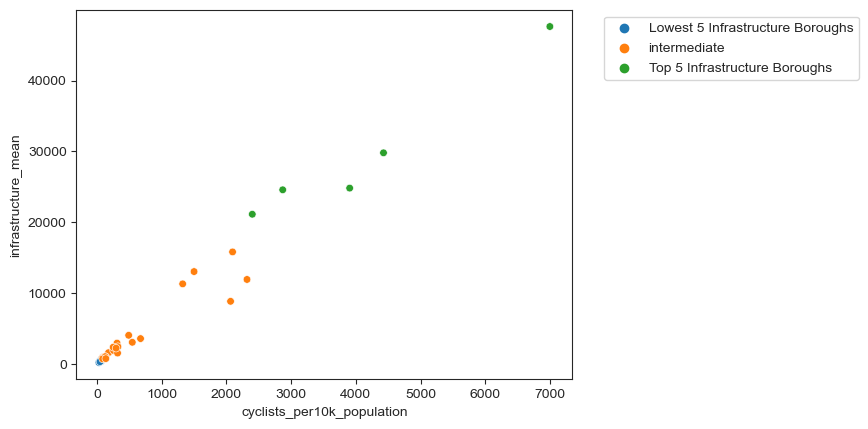

In [1124]:
sns.scatterplot(x="cyclists_per10k_population", y="infrastructure_mean", hue='infrastructure_category', s=30, data=df_minus_sig)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot()

In [1125]:
#subsetting 

df_minus_sig_sub = df_minus_sig[df_minus_sig['borough_name'].isin(['Southwark','Lambeth','Camden','Westminster','Islington','Enfield','Barking & Dagenham','Havering','Bexley','Harrow'])]

In [1126]:
df_minus_sig_sub

,borough_name,borough_code,gla_region,cyclists_per10k_population,0to9,10to19,20to29,30to39,40to49,50to59,...,signal_total_per_10k_pop,traffic_calm_per_10k_pop,cyle_prk_per_10k_pop,crossing_per_10k_pop,cyle_ln_sqkm,traffic_calm_sqkm,cyle_prk_sqkm,crossing_sqkm,infrastructure_mean,infrastructure_category
0,Barking & Dagenham,E09000002,Outer,64.88,35582,33354,28456,36693,32005,25161,...,0.000000,160.906567,82.259193,9.661618,560.747922,233.858268,140.153846,12.768496,375.4675,Lowest 5 Infrastructure Boroughs
2,Bexley,E09000004,Outer,40.41,31226,30552,28385,34822,33146,33873,...,0.000000,80.281882,41.036423,2.881115,322.491749,166.290323,91.493056,5.237084,269.6050,Lowest 5 Infrastructure Boroughs
5,Camden,E09000007,Inner,4426.98,19905,24130,42167,37089,27860,25013,...,3.778765,146.215066,334.844839,4.935530,576.605505,330.313589,432.685600,7.252125,29809.4950,Top 5 Infrastructure Boroughs
8,Enfield,E09000010,Outer,47.20,44009,45445,40293,47105,47302,43758,...,0.461581,93.123891,55.735860,13.616628,422.190594,234.422658,158.230958,33.076384,420.7925,Lowest 5 Infrastructure Boroughs
13,Harrow,E09000015,Outer,33.21,31832,31523,33599,41591,36930,31699,...,0.607247,102.245298,72.110640,5.275463,343.841584,223.198012,147.744946,8.731156,226.9100,Lowest 5 Infrastructure Boroughs
14,Havering,E09000016,Outer,49.56,33353,30332,31043,38480,33653,34329,...,0.000000,78.817734,68.514271,9.476178,171.647373,181.158168,153.755274,17.166213,341.7500,Lowest 5 Infrastructure Boroughs
17,Islington,E09000019,Inner,3904.50,21186,20592,47226,46318,27405,24724,...,2.455273,207.470578,281.374298,3.846595,735.973154,533.123028,315.412844,4.394577,24829.8750,Top 5 Infrastructure Boroughs
20,Lambeth,E09000022,Inner,2400.96,30205,30419,72092,62994,42855,38655,...,4.265888,206.457268,205.814463,5.493061,1014.104478,737.578288,310.308370,9.480585,21143.4900,Top 5 Infrastructure Boroughs
26,Southwark,E09000028,Inner,2870.57,32255,32421,63741,61494,41769,37127,...,4.929677,253.217065,296.261561,9.498646,917.058824,799.240987,475.675676,15.807904,24592.1450,Top 5 Infrastructure Boroughs
31,Westminster,E09000033,Inner,6995.62,16379,19286,42582,37004,27816,26808,...,13.342635,56.191554,403.252553,9.606697,554.697674,156.144068,507.338129,13.907285,47625.6550,Top 5 Infrastructure Boroughs


In [1127]:
data = {
    "borough_name": ["Barking & Dagenham", "Bexley","Enfield","Harrow","Havering","Lambeth", "Southwark", "Camden", "Islington", "Westminster"],
    "infrastructure_category": ['Lowest 5 Infrastructure Boroughs', 'Lowest 5 Infrastructure Boroughs', 'Lowest 5 Infrastructure Boroughs', 'Lowest 5 Infrastructure Boroughs', 'Lowest 5 Infrastructure Boroughs', 'Top 5 Infrastructure Boroughs', 'Top 5 Infrastructure Boroughs', 'Top 5 Infrastructure Boroughs','Top 5 Infrastructure Boroughs','Top 5 Infrastructure Boroughs']}

In [1128]:
# create dataframe from data dictionary
df = pd.DataFrame(data)
# print the dataframe
display(df.head())

,borough_name,infrastructure_category
0,Barking & Dagenham,Lowest 5 Infrastructure Boroughs
1,Bexley,Lowest 5 Infrastructure Boroughs
2,Enfield,Lowest 5 Infrastructure Boroughs
3,Harrow,Lowest 5 Infrastructure Boroughs
4,Havering,Lowest 5 Infrastructure Boroughs


In [1129]:
df_minus_sig_sub

,borough_name,borough_code,gla_region,cyclists_per10k_population,0to9,10to19,20to29,30to39,40to49,50to59,...,signal_total_per_10k_pop,traffic_calm_per_10k_pop,cyle_prk_per_10k_pop,crossing_per_10k_pop,cyle_ln_sqkm,traffic_calm_sqkm,cyle_prk_sqkm,crossing_sqkm,infrastructure_mean,infrastructure_category
0,Barking & Dagenham,E09000002,Outer,64.88,35582,33354,28456,36693,32005,25161,...,0.000000,160.906567,82.259193,9.661618,560.747922,233.858268,140.153846,12.768496,375.4675,Lowest 5 Infrastructure Boroughs
2,Bexley,E09000004,Outer,40.41,31226,30552,28385,34822,33146,33873,...,0.000000,80.281882,41.036423,2.881115,322.491749,166.290323,91.493056,5.237084,269.6050,Lowest 5 Infrastructure Boroughs
5,Camden,E09000007,Inner,4426.98,19905,24130,42167,37089,27860,25013,...,3.778765,146.215066,334.844839,4.935530,576.605505,330.313589,432.685600,7.252125,29809.4950,Top 5 Infrastructure Boroughs
8,Enfield,E09000010,Outer,47.20,44009,45445,40293,47105,47302,43758,...,0.461581,93.123891,55.735860,13.616628,422.190594,234.422658,158.230958,33.076384,420.7925,Lowest 5 Infrastructure Boroughs
13,Harrow,E09000015,Outer,33.21,31832,31523,33599,41591,36930,31699,...,0.607247,102.245298,72.110640,5.275463,343.841584,223.198012,147.744946,8.731156,226.9100,Lowest 5 Infrastructure Boroughs
14,Havering,E09000016,Outer,49.56,33353,30332,31043,38480,33653,34329,...,0.000000,78.817734,68.514271,9.476178,171.647373,181.158168,153.755274,17.166213,341.7500,Lowest 5 Infrastructure Boroughs
17,Islington,E09000019,Inner,3904.50,21186,20592,47226,46318,27405,24724,...,2.455273,207.470578,281.374298,3.846595,735.973154,533.123028,315.412844,4.394577,24829.8750,Top 5 Infrastructure Boroughs
20,Lambeth,E09000022,Inner,2400.96,30205,30419,72092,62994,42855,38655,...,4.265888,206.457268,205.814463,5.493061,1014.104478,737.578288,310.308370,9.480585,21143.4900,Top 5 Infrastructure Boroughs
26,Southwark,E09000028,Inner,2870.57,32255,32421,63741,61494,41769,37127,...,4.929677,253.217065,296.261561,9.498646,917.058824,799.240987,475.675676,15.807904,24592.1450,Top 5 Infrastructure Boroughs
31,Westminster,E09000033,Inner,6995.62,16379,19286,42582,37004,27816,26808,...,13.342635,56.191554,403.252553,9.606697,554.697674,156.144068,507.338129,13.907285,47625.6550,Top 5 Infrastructure Boroughs


In [1130]:
#review of top and bottom borough 

df1 = df_minus_sig_sub[['borough_name','cyclists_per10k_population','infrastructure_category']]
df1

,borough_name,cyclists_per10k_population,infrastructure_category
0,Barking & Dagenham,64.88,Lowest 5 Infrastructure Boroughs
2,Bexley,40.41,Lowest 5 Infrastructure Boroughs
5,Camden,4426.98,Top 5 Infrastructure Boroughs
8,Enfield,47.20,Lowest 5 Infrastructure Boroughs
13,Harrow,33.21,Lowest 5 Infrastructure Boroughs
14,Havering,49.56,Lowest 5 Infrastructure Boroughs
17,Islington,3904.50,Top 5 Infrastructure Boroughs
20,Lambeth,2400.96,Top 5 Infrastructure Boroughs
26,Southwark,2870.57,Top 5 Infrastructure Boroughs
31,Westminster,6995.62,Top 5 Infrastructure Boroughs


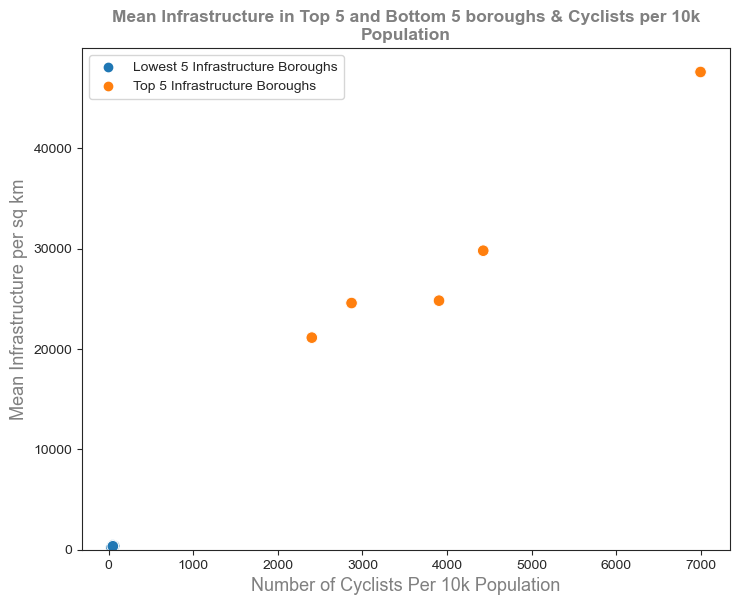

In [1131]:
plt.subplots(figsize=(7.5,6))

sns.scatterplot(x="cyclists_per10k_population", y="infrastructure_mean", s=70, hue='infrastructure_category', data=df_minus_sig_sub)
plt.plot()


plt.xlabel("Number of Cyclists Per 10k Population",fontsize=13,color='grey')
plt.ylabel("Mean Infrastructure per sq km",fontsize=13,color='grey')

plt.title('Mean Infrastructure in Top 5 and Bottom 5 boroughs & Cyclists per 10k Population',fontsize=12.5,color='grey',weight='bold',pad=8,wrap=True)
plt.ylim(0)
#plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',fontsize=10);
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
plt.tight_layout()
plt.savefig("df_minus_sig_sub.png")
plt.show()

In [1132]:
df_val_full.columns

Index(['borough_name', 'borough_code', 'gla_region', 'cyclists_per10k', '0to9',
       '10to19', '20to29', '30to39', '40to49', '50to59', '60to69', '70to79',
       '80plus', 'cohabiting', 'married_civptnr', 'multi_person', 'single',
       'single_parent', 'asn_bangl', 'asn_chi', 'asn_ind', 'asn_oth',
       'asn_pak', 'blk_afr', 'blk_car', 'blk_oth', 'mix_oth', 'mix_whtasn',
       'mix_whtblkafr', 'mix_whtblkcar', 'oth_arab', 'oth_oth', 'wht_brit',
       'wht_gyptvl', 'wht_irish', 'wht_oth', 'wht_rom', 'asn_total',
       'blk_total', 'mix_total', 'wht_total', 'oth_total', 'cyle_ln_total',
       'signal_total', 'traffic_calm_total', 'cyle_prk_total',
       'crossing_total', 'male_cyclist', 'female_cyclist',
       'male_cyclist_per10k', 'female_cyclist_per10k', 'hire_bikes',
       'private_bikes', 'hire_bikes_per10k', 'private_bikes_per10k',
       'bike_thefts', 'total_bikes', 'bike_thefts_per10k_pop',
       'bike_thefts_per10k_bikes'],
      dtype='object')

## <a id="division_ID3">2.0 Second Round of EDA focussed on Cylce Parking only as significant factor </a> 

In [1133]:
df = pd.read_excel('LONDON_data_set_3_values_with_full_parking.xlsx')

In [1134]:
#sense checking 

print(df.columns)
print()

Index(['borough_name', 'borough_code', 'cyclists_per10k', 'gla_region',
       'population', 'sqkms', '0to9', '10to19', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70to79', '80plus', 'cohabiting', 'married_civptnr',
       'multi_person', 'single', 'single_parent', 'asn_bangl', 'asn_chi',
       'asn_ind', 'asn_oth', 'asn_pak', 'blk_afr', 'blk_car', 'blk_oth',
       'mix_oth', 'mix_whtasn', 'mix_whtblkafr', 'mix_whtblkcar', 'oth_arab',
       'oth_oth', 'wht_brit', 'wht_gyptvl', 'wht_irish', 'wht_oth', 'wht_rom',
       'asn_total', 'blk_total', 'mix_total', 'wht_total', 'oth_total',
       'cyle_ln_total', 'signal_total', 'traffic_calm_total', 'cyle_prk_total',
       'crossing_total', 'male_cyclist', 'female_cyclist',
       'male_cyclist_per10k', 'female_cyclist_per10k', 'hire_bikes',
       'private_bikes', 'hire_bikes_per10k', 'private_bikes_per10k', '10k_pop',
       'Prk Buterf2', 'Prk Carr3', 'Prk Cover4', 'Prk Hangar5', 'Prk Hoop6',
       'Prk Locker7', 'Prk Ms

In [1135]:
#exclude outlier because of low population numbers 

df = df.query('borough_name !="City of London"')

In [1136]:
#sorting values to aid readability 

df.sort_values(by='secure_per_10k_pop',inplace=True)

In [1137]:
df.head()

,borough_name,borough_code,cyclists_per10k,gla_region,population,sqkms,0to9,10to19,20to29,30to39,...,Prk Tier14,Prk Wheel15,Secure,Unsecure,Prk Cpt,Prk Provis,secure_per_10k_cyclists,unsecure_per_10k_cyclists,secure_per_10k_pop,unsecure_per_10k_pop
1,Barnet,E09000003,92.08,Outer,411275,86.7,49355,47271,50436,60964,...,12,14,0,896,4998,2228,0.0,9.730669,0.0,21.785910
2,Bexley,E09000004,40.41,Outer,256845,60.6,31226,30552,28385,34822,...,0,2,0,390,2360,1054,0.0,9.651076,0.0,15.184255
28,Sutton,E09000029,139.21,Outer,213340,43.8,27046,25710,22416,31376,...,6,2,0,650,3080,1324,0.0,4.669205,0.0,30.467798
8,Ealing,E09000009,312.51,Outer,369685,55.5,43760,45449,51526,61546,...,2,12,0,2052,7888,3772,0.0,6.566190,0.0,55.506715
9,Enfield,E09000010,47.20,Outer,346635,80.8,44009,45445,40293,47105,...,0,0,0,772,4186,1932,0.0,16.355932,0.0,22.271265


In [1138]:
#labelling categories in additional columns of the dataframe to describe dataset 

data_secure = {
    "borough_name": ["Hackney", "Tower Hamlets","Wandsworth", "Camden", "Islington"],
    "Top 5 Secure Parking": ['Top 5 Secure Parking', 'Top 5 Secure Parking', 'Top 5 Secure Parking', 'Top 5 Secure Parking', 'Top 5 Secure Parking']}

data_unsecure = {
    "borough_name": ["Hackney", "Hammersmith & Fulham","Kensington & Chelsea", "Camden", "Westminster"],
    "Top 5 Unsecure Parking": ['Top 5 Unsecure Parking', 'Top 5 Unsecure Parking', 'Top 5 Unsecure Parking', 'Top 5 Unsecure Parking', 'Top 5 Unsecure Parking']}

In [1139]:
# create dataframe from data dictionary
df_secure = pd.DataFrame(data_secure)
# print the dataframe
display(df_secure.head())

,borough_name,Top 5 Secure Parking
0,Hackney,Top 5 Secure Parking
1,Tower Hamlets,Top 5 Secure Parking
2,Wandsworth,Top 5 Secure Parking
3,Camden,Top 5 Secure Parking
4,Islington,Top 5 Secure Parking


In [1140]:
# create dataframe from data dictionary
df_unsecure = pd.DataFrame(data_unsecure)
# print the dataframe
display(df_unsecure.head())

,borough_name,Top 5 Unsecure Parking
0,Hackney,Top 5 Unsecure Parking
1,Hammersmith & Fulham,Top 5 Unsecure Parking
2,Kensington & Chelsea,Top 5 Unsecure Parking
3,Camden,Top 5 Unsecure Parking
4,Westminster,Top 5 Unsecure Parking


In [1141]:
#merging dataframe and creating a primary key on 'borough_name'

df = df.merge(df_secure , on= 'borough_name', how='left')
df.head()


,borough_name,borough_code,cyclists_per10k,gla_region,population,sqkms,0to9,10to19,20to29,30to39,...,Prk Wheel15,Secure,Unsecure,Prk Cpt,Prk Provis,secure_per_10k_cyclists,unsecure_per_10k_cyclists,secure_per_10k_pop,unsecure_per_10k_pop,Top 5 Secure Parking
0,Barnet,E09000003,92.08,Outer,411275,86.7,49355,47271,50436,60964,...,14,0,896,4998,2228,0.0,9.730669,0.0,21.785910,NaN
1,Bexley,E09000004,40.41,Outer,256845,60.6,31226,30552,28385,34822,...,2,0,390,2360,1054,0.0,9.651076,0.0,15.184255,NaN
2,Sutton,E09000029,139.21,Outer,213340,43.8,27046,25710,22416,31376,...,2,0,650,3080,1324,0.0,4.669205,0.0,30.467798,NaN
3,Ealing,E09000009,312.51,Outer,369685,55.5,43760,45449,51526,61546,...,12,0,2052,7888,3772,0.0,6.566190,0.0,55.506715,NaN
4,Enfield,E09000010,47.20,Outer,346635,80.8,44009,45445,40293,47105,...,0,0,772,4186,1932,0.0,16.355932,0.0,22.271265,NaN


In [1142]:
df["Top 5 Secure Parking"].fillna("Lower 27 Secure Parking", inplace = True)

In [1143]:
#merging again 

df = df.merge(df_unsecure , on= 'borough_name', how='left')
df.head()

,borough_name,borough_code,cyclists_per10k,gla_region,population,sqkms,0to9,10to19,20to29,30to39,...,Secure,Unsecure,Prk Cpt,Prk Provis,secure_per_10k_cyclists,unsecure_per_10k_cyclists,secure_per_10k_pop,unsecure_per_10k_pop,Top 5 Secure Parking,Top 5 Unsecure Parking
0,Barnet,E09000003,92.08,Outer,411275,86.7,49355,47271,50436,60964,...,0,896,4998,2228,0.0,9.730669,0.0,21.785910,Lower 27 Secure Parking,NaN
1,Bexley,E09000004,40.41,Outer,256845,60.6,31226,30552,28385,34822,...,0,390,2360,1054,0.0,9.651076,0.0,15.184255,Lower 27 Secure Parking,NaN
2,Sutton,E09000029,139.21,Outer,213340,43.8,27046,25710,22416,31376,...,0,650,3080,1324,0.0,4.669205,0.0,30.467798,Lower 27 Secure Parking,NaN
3,Ealing,E09000009,312.51,Outer,369685,55.5,43760,45449,51526,61546,...,0,2052,7888,3772,0.0,6.566190,0.0,55.506715,Lower 27 Secure Parking,NaN
4,Enfield,E09000010,47.20,Outer,346635,80.8,44009,45445,40293,47105,...,0,772,4186,1932,0.0,16.355932,0.0,22.271265,Lower 27 Secure Parking,NaN


In [1144]:
df["Top 5 Unsecure Parking"].fillna("Lower 27 Unsecure Parking", inplace = True)

In [1145]:
df.head()

,borough_name,borough_code,cyclists_per10k,gla_region,population,sqkms,0to9,10to19,20to29,30to39,...,Secure,Unsecure,Prk Cpt,Prk Provis,secure_per_10k_cyclists,unsecure_per_10k_cyclists,secure_per_10k_pop,unsecure_per_10k_pop,Top 5 Secure Parking,Top 5 Unsecure Parking
0,Barnet,E09000003,92.08,Outer,411275,86.7,49355,47271,50436,60964,...,0,896,4998,2228,0.0,9.730669,0.0,21.785910,Lower 27 Secure Parking,Lower 27 Unsecure Parking
1,Bexley,E09000004,40.41,Outer,256845,60.6,31226,30552,28385,34822,...,0,390,2360,1054,0.0,9.651076,0.0,15.184255,Lower 27 Secure Parking,Lower 27 Unsecure Parking
2,Sutton,E09000029,139.21,Outer,213340,43.8,27046,25710,22416,31376,...,0,650,3080,1324,0.0,4.669205,0.0,30.467798,Lower 27 Secure Parking,Lower 27 Unsecure Parking
3,Ealing,E09000009,312.51,Outer,369685,55.5,43760,45449,51526,61546,...,0,2052,7888,3772,0.0,6.566190,0.0,55.506715,Lower 27 Secure Parking,Lower 27 Unsecure Parking
4,Enfield,E09000010,47.20,Outer,346635,80.8,44009,45445,40293,47105,...,0,772,4186,1932,0.0,16.355932,0.0,22.271265,Lower 27 Secure Parking,Lower 27 Unsecure Parking


## <a id="division_ID4"> 2.1 Preliminary Visualisations </a> 

[]

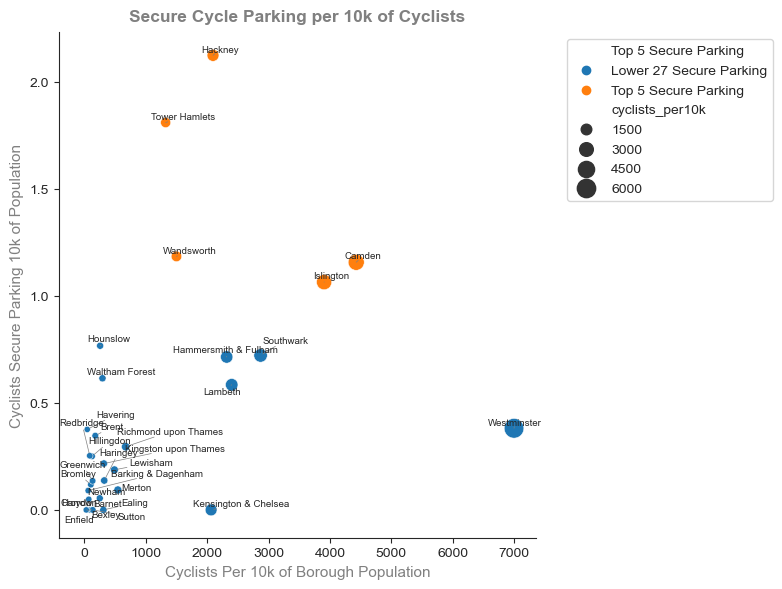

In [1146]:
plt.figure(figsize=(8,6))

texts = []

# Set the ggplot-like style
sns.set_style("ticks")
sns.scatterplot(x="cyclists_per10k", y="secure_per_10k_pop", hue='Top 5 Secure Parking', size='cyclists_per10k', sizes=(20, 200), edgecolor='w', data=df)

# Add labels to each point, positioned above the data points
for i in range(len(df)):
        texts.append(plt.text(df['cyclists_per10k'].iloc[i], df['secure_per_10k_pop'].iloc[i], 
                              df['borough_name'].iloc[i], fontsize=7, ha='center', va='bottom'))

# Use adjust_text to optimise label placement
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()

plt.xlabel("Cyclists Per 10k of Borough Population",fontsize=11,color='grey')
plt.ylabel("Cyclists Secure Parking 10k of Population",fontsize=11,color='grey')

plt.title('Secure Cycle Parking per 10k of Cyclists',fontsize=12.5,color='grey',weight='bold',pad=8,wrap=True)



frame.set_facecolor('white')
plt.tight_layout()
plt.savefig("df_secure.png")
plt.plot()

[]

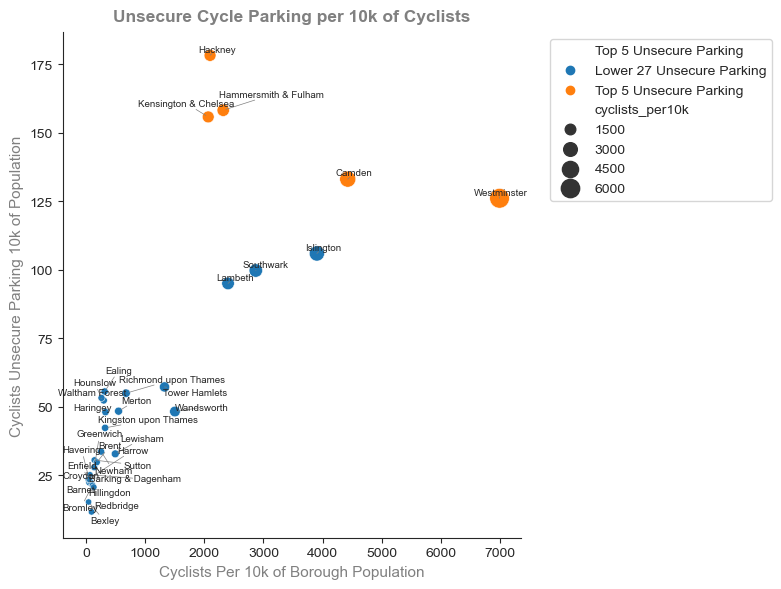

In [1147]:
plt.figure(figsize=(8,6))

# Iterate 
texts = []


sns.set_style("ticks")
sns.scatterplot(x="cyclists_per10k", y="unsecure_per_10k_pop", hue='Top 5 Unsecure Parking', size='cyclists_per10k', sizes=(20, 200), edgecolor='w', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')




# Add labels to each point, positioned above the data points
for i in range(len(df)):
        texts.append(plt.text(df['cyclists_per10k'].iloc[i], df['unsecure_per_10k_pop'].iloc[i], 
                              df['borough_name'].iloc[i], fontsize=7, ha='center', va='bottom'))

# Use adjust_text to optimise label placement
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))


sns.despine()


plt.xlabel("Cyclists Per 10k of Borough Population",fontsize=11,color='grey')
plt.ylabel("Cyclists Unsecure Parking 10k of Population",fontsize=11,color='grey')

plt.title('Unsecure Cycle Parking per 10k of Cyclists',fontsize=12.5,color='grey',weight='bold',pad=8,wrap=True)


frame.set_facecolor('white')
plt.tight_layout()
plt.savefig("df_unsecure.png")
plt.plot()

<Figure size 1500x600 with 0 Axes>

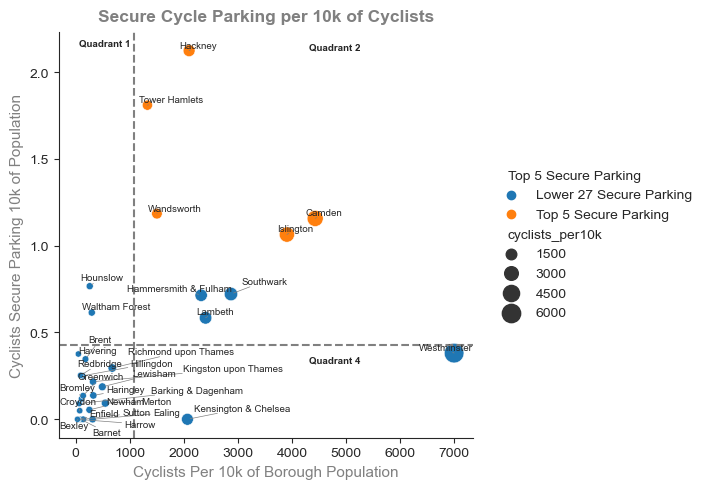

In [1148]:
plt.figure(figsize=(15,6))


# Calculate mean values
x_mean = df["cyclists_per10k"].mean()
y_mean = df["secure_per_10k_pop"].mean()

texts = []

# Set the ggplot-like style
sns.set_style("ticks")
g = sns.relplot(x="cyclists_per10k", y="secure_per_10k_pop", hue='Top 5 Secure Parking', size='cyclists_per10k', sizes=(20, 200), edgecolor='w', data=df)

# Add quadrant lines
for ax in g.axes.flat:
    ax.axvline(x_mean, ls="--", color="grey")  # Vertical line at x mean
    ax.axhline(y_mean, ls="--", color="grey")  # Horizontal line at y mean

# Add labels to each point, positioned above the data points
for i in range(len(df)):
        texts.append(plt.text(df['cyclists_per10k'].iloc[i], df['secure_per_10k_pop'].iloc[i], 
                              df['borough_name'].iloc[i], fontsize=7, ha='center', va='bottom'))

# Use adjust_text to optimise label placement
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add quadrant annotations
for ax in g.axes.flat:
    ax.text(x_mean*0.5, y_mean*5.0, "Quadrant 1", ha="center", va="bottom", fontweight="bold",fontsize=7)
    ax.text(x_mean*4.0, y_mean*5.0, "Quadrant 2", ha="left", va="center", fontweight="bold",fontsize=7)
    #ax.text(x_mean*0.8, y_mean*0.8, "Quadrant 3", ha="center", va="top", fontweight="bold")
    ax.text(x_mean*4.0, y_mean*0.8, "Quadrant 4", ha="left", va="center", fontweight="bold",fontsize=7)



sns.despine()

plt.xlabel("Cyclists Per 10k of Borough Population",fontsize=11,color='grey')
plt.ylabel("Cyclists Secure Parking 10k of Population",fontsize=11,color='grey')

plt.title('Secure Cycle Parking per 10k of Cyclists',fontsize=12.5,color='grey',weight='bold',pad=8,wrap=True)

g.tight_layout()
plt.show()

frame.set_facecolor('white')


# <a id="division_ID6">3.0 Final Figures ready for June 3rd Presentation </a> 

<Figure size 1000x900 with 0 Axes>

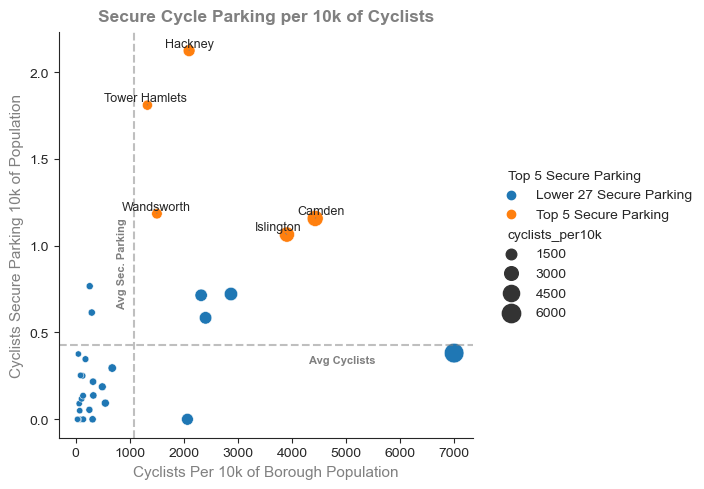

In [1149]:
plt.figure(figsize=(10,9))


# Calculate mean values
x_mean = df["cyclists_per10k"].mean()
y_mean = df["secure_per_10k_pop"].mean()


# Create scatterplot
g = sns.relplot(x="cyclists_per10k", 
                y="secure_per_10k_pop", 
                hue='Top 5 Secure Parking', 
                size='cyclists_per10k', 
                sizes=(20, 200), 
                edgecolor='w', 
                data=df)

# Filter the DataFrame to include only the 5 chosen boroughs
chosen_boroughs = ['Hackney', 'Tower Hamlets', 'Wandsworth', 'Camden', 'Islington']
chosen_data = df[df['borough_name'].isin(chosen_boroughs)]

# Add labels to the chosen boroughs, positioned above the data points
texts = [plt.text(chosen_data['cyclists_per10k'].iloc[i], chosen_data['secure_per_10k_pop'].iloc[i], 
                  chosen_data['borough_name'].iloc[i], fontsize=9, ha='center', va='bottom') for i in range(len(chosen_data))]

sns.despine()

# Use adjust_text to optimise label placement
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))


# Add quadrant lines
for ax in g.axes.flat:
    ax.axvline(x_mean, ls="--", color="grey", alpha=0.5)  # Vertical line at x mean
    ax.axhline(y_mean, ls="--", color="grey",alpha=0.5)  # Horizontal line at y mean
    
# Add quadrant annotations
for ax in g.axes.flat:
    ax.text(x_mean*0.8, y_mean*1.5, "Avg Sec. Parking", ha="center", va="bottom",rotation=90, fontweight="bold",color="grey",fontsize=8)
    ax.text(x_mean*4.0, y_mean*0.8, "Avg Cyclists", ha="left", va="center", fontweight="bold",color="grey",fontsize=8)
  
plt.xlabel("Cyclists Per 10k of Borough Population",fontsize=11,color='grey')
plt.ylabel("Cyclists Secure Parking 10k of Population",fontsize=11,color='grey')

plt.title('Secure Cycle Parking per 10k of Cyclists',fontsize=12.5,color='grey',weight='bold',pad=8,wrap=True)

g.tight_layout()
frame.set_facecolor('white')
plt.savefig("FINAL_secure.png")
plt.show()


[]

<Figure size 1000x900 with 0 Axes>

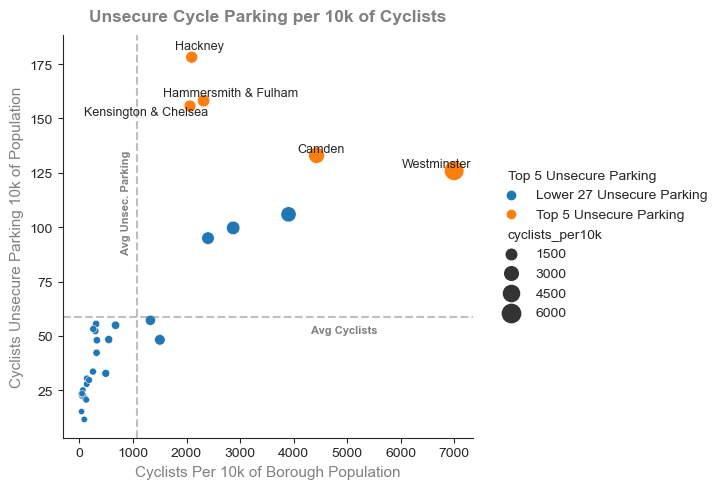

In [1150]:
plt.figure(figsize=(10,9))


# Calculate mean values
x_mean = df["cyclists_per10k"].mean()
y_mean = df["unsecure_per_10k_pop"].mean()

sns.set_style("ticks")
g = sns.relplot(x="cyclists_per10k", 
                    y="unsecure_per_10k_pop", 
                    hue='Top 5 Unsecure Parking', 
                    size='cyclists_per10k', sizes=(20, 200), 
                    edgecolor='w', 
                    data=df)

# Filter the DataFrame to include only the 5 chosen boroughs
chosen_boroughs = ['Hackney', 'Hammersmith & Fulham', 'Westminster', 'Camden', 'Kensington & Chelsea']
chosen_data = df[df['borough_name'].isin(chosen_boroughs)]

# Add labels to the chosen boroughs, positioned above the data points
texts = [plt.text(chosen_data['cyclists_per10k'].iloc[i], chosen_data['unsecure_per_10k_pop'].iloc[i], 
                  chosen_data['borough_name'].iloc[i], fontsize=9, ha='center', va='bottom') for i in range(len(chosen_data))]


# Use adjust_text to optimise label placement
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))


# Add quadrant lines
for ax in g.axes.flat:
    ax.axvline(x_mean, ls="--", color="grey", alpha=0.5)  # Vertical line at x mean
    ax.axhline(y_mean, ls="--", color="grey",alpha=0.5)  # Horizontal line at y mean
    
# Add quadrant annotations
for ax in g.axes.flat:
    ax.text(x_mean*0.8, y_mean*1.5, "Avg Unsec. Parking", ha="center", va="bottom",rotation=90, fontweight="bold",color="grey",fontsize=8)
    ax.text(x_mean*4.0, y_mean*0.9, "Avg Cyclists", ha="left", va="center", fontweight="bold",color="grey",fontsize=8)

plt.xlabel("Cyclists Per 10k of Borough Population",fontsize=11,color='grey')
plt.ylabel("Cyclists Unsecure Parking 10k of Population",fontsize=11,color='grey')
plt.title('Unsecure Cycle Parking per 10k of Cyclists',fontsize=12.5,color='grey',weight='bold',pad=10,wrap=True)


frame.set_facecolor('black')
g.tight_layout()
plt.savefig("FINAL_unsecure.png")
plt.plot()